In [148]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.cluster import KMeans,kmeans_plusplus
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")

# Exploring & Visualizing Data 

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
frequ_1=dataset.groupby("Genre")[["Annual Income (k$)"]].sum()
frequ_2=dataset.groupby("Genre")[["Spending Score (1-100)"]].sum()
frequ_1

,Annual Income (k$)
Genre,
Female,6636
Male,5476


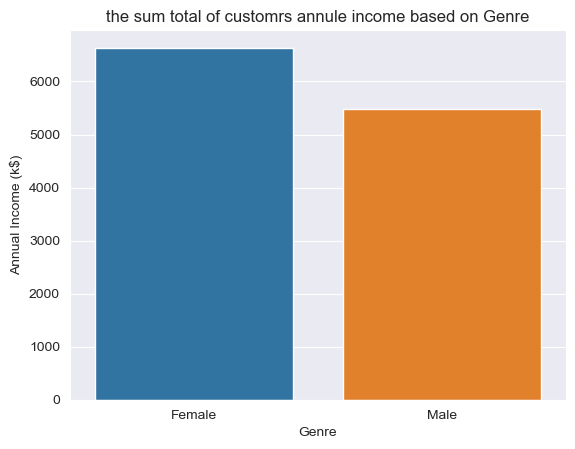

In [63]:
plt.title("the sum total of customrs annule income based on Genre")
sns.barplot(x=frequ_1.index,y='Annual Income (k$)',data=frequ_1);

In [37]:
frequ_2

,Spending Score (1-100)
Genre,
Female,5771
Male,4269


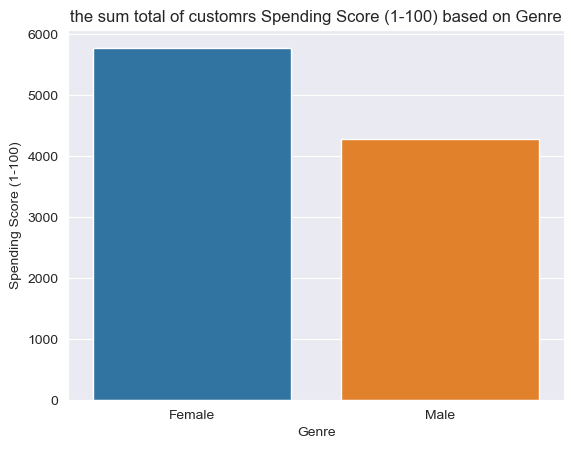

In [62]:
plt.title("the sum total of customrs Spending Score (1-100) based on Genre")
sns.barplot(x=frequ_2.index,y='Spending Score (1-100)',data=frequ_2);

In [40]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
avrage_spending_score_based_on_age=dataset[dataset["Spending Score (1-100)"]>dataset["Spending Score (1-100)"].mean()]

In [50]:
avrage_spending_score_based_on_age=avrage_spending_score_based_on_age[avrage_spending_score_based_on_age.Age<avrage_spending_score_based_on_age.Age.mean()]

In [52]:
avrage_spending_score_based_on_age["Annual Income (k$)"].meann()

59.0

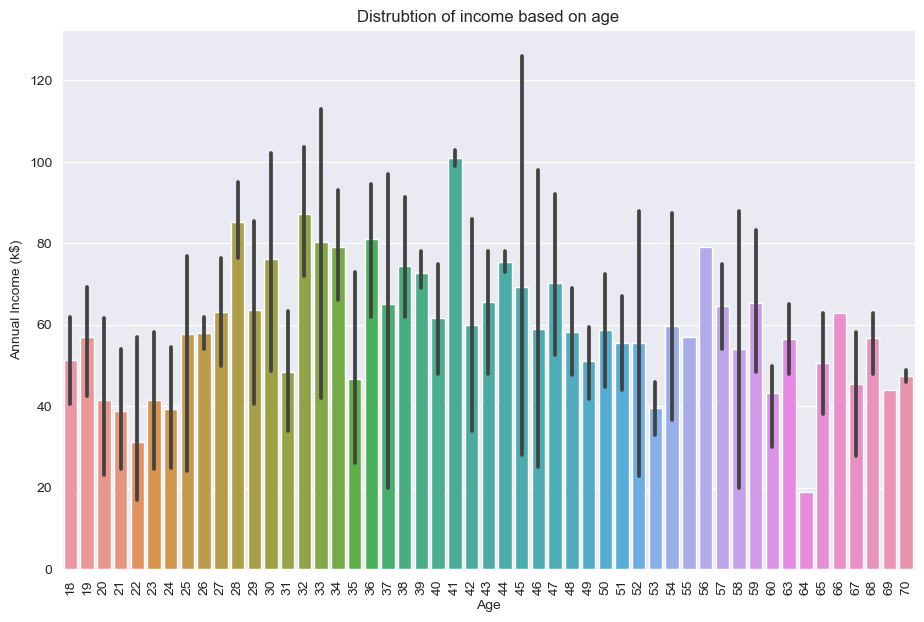

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize=[11,7])
plt.title("Distrubtion of income based on age")
sns.barplot(x="Age",y='Annual Income (k$)',data=dataset)
plt.xticks(rotation=90);

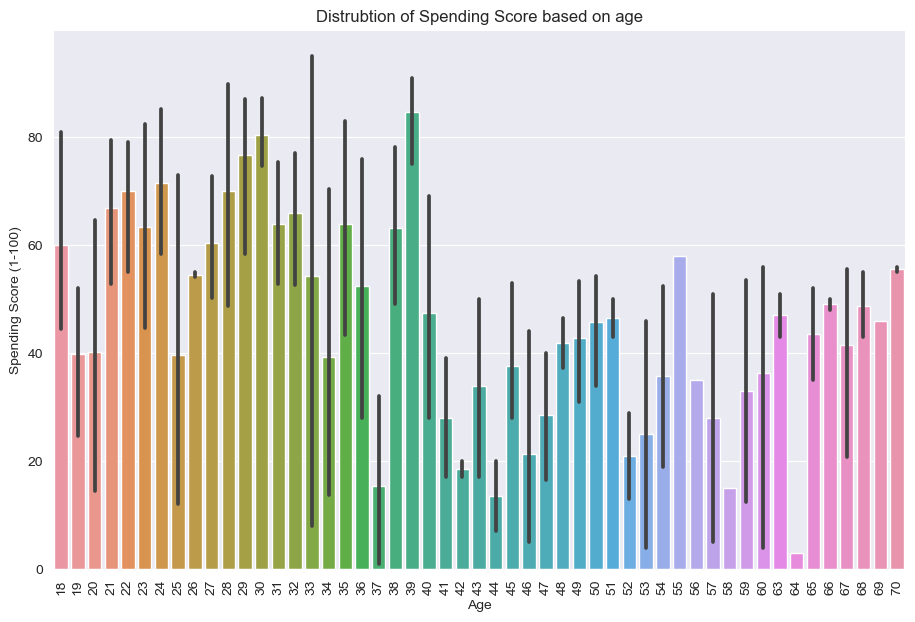

In [66]:
plt.figure(figsize=[11,7])
plt.title("Distrubtion of Spending Score based on age")
sns.barplot(x="Age",y='Spending Score (1-100)',data=dataset)
plt.xticks(rotation=90);

In [67]:
people_with_spending_score_blow_30=dataset[dataset['Spending Score (1-100)']<30]

In [70]:
people_with_spending_score_blow_30.size
dataset['Spending Score (1-100)'].mean()

230

In [100]:
print('{}% of our costummers have a spedning score blow 30 with the mean being {}'.format(((people_with_spending_score_blow_30.CustomerID.count()/dataset.CustomerID.count())*100),
                                                                                     dataset['Spending Score (1-100)'].mean()))

23.0% of our costummers have a spedning score blow 30 with the mean being 50.2


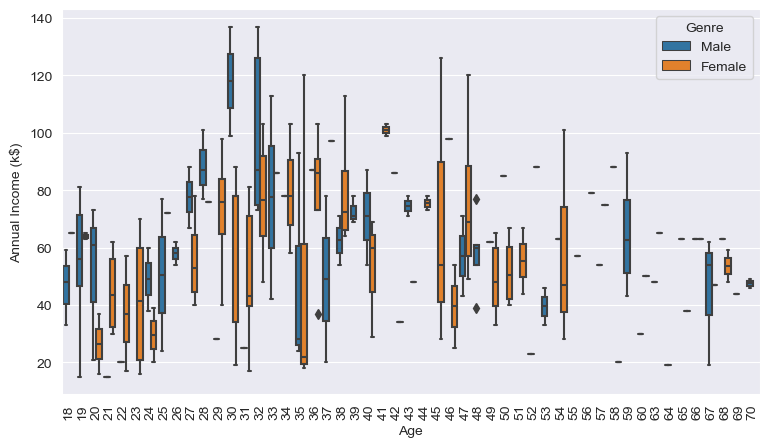

In [88]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Age",y="Annual Income (k$)",hue='Genre',data=dataset)
plt.xticks(rotation=90);

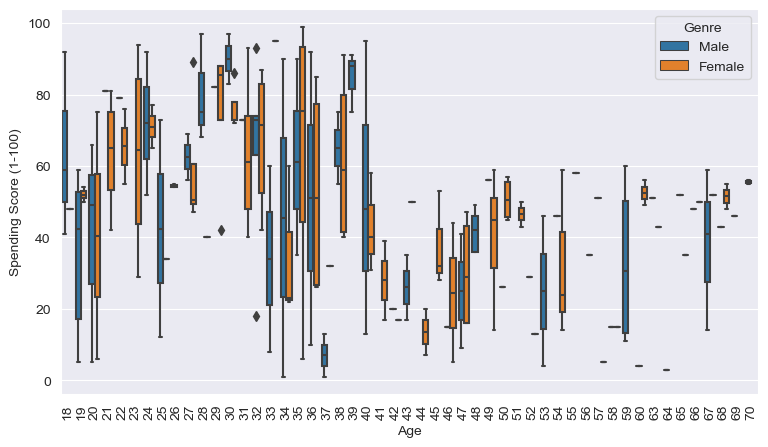

In [102]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Age",y="Spending Score (1-100)",hue='Genre',data=dataset)
plt.xticks(rotation=90);

In [98]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Building K-mean model

In [118]:
X=dataset.iloc[:,3:]

In [119]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Elbow method to find the optimal number of clusters

In [126]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Re\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


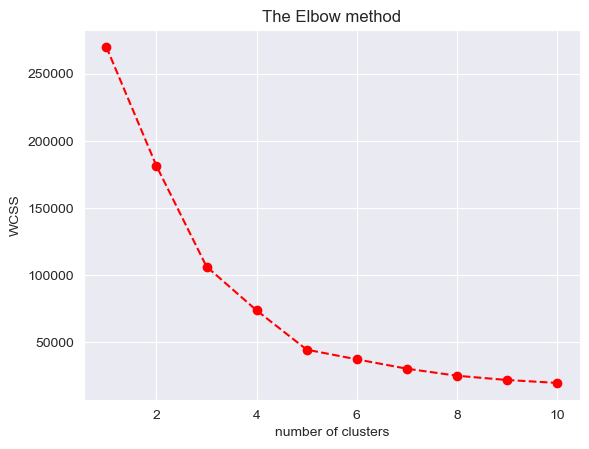

In [135]:
plt.title("The Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.plot(np.arange(1,11,1),wcss,"o--r");

In [140]:
k_means=KMeans(n_clusters=5,init='k-means++')
y_kmeans=k_means.fit_predict(X)

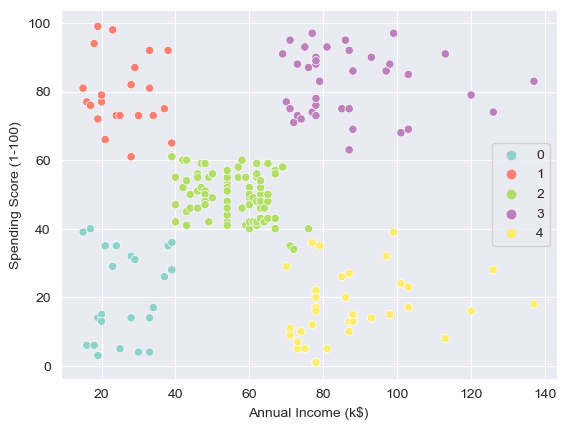

In [154]:
sns.scatterplot(data=dataset,x=dataset['Annual Income (k$)'],y=dataset['Spending Score (1-100)'],hue=y_kmeans,palette=cm.Set3,
                markers=True);

In [145]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
